In [1]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import random
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
vocab_size = 20000

In [3]:
def tokenize_sentence(sentence):

    sentence_strip_numbers = re.sub(r"[0-9]+", "", sentence)
    final_sentence = re.sub(
        r"!|@|#|$|%|^|&|:|;|'|<|>|/|-|=|(|)|", "", sentence_strip_numbers)
    final_sentence = re.sub('[\W\_]',' ', final_sentence)

    split_sentence = re.split('\s+', final_sentence)
    # new_sentence = [word_tokenize(word) for word in split_sentence]
    return split_sentence

In [4]:
def pre_model_processing(summary):
    tokenized_sentence = str(tokenize_sentence(summary))
    # print(tokenized_sentence)
    encoded_data = [one_hot(tokenized_sentence, vocab_size)]
    # print(encoded_data)
    return np.array(encoded_data[0])

In [5]:
amazon_data = pd.read_csv('../../dataset/amazon.csv')
amazon_data.head(10)

,Text,Score
0,The description and photo on this product need...,3
1,This was a great book!!!! It is well thought t...,5
2,"I am a first year teacher, teaching 5th grade....",5
3,I got the book at my bookfair at school lookin...,5
4,Hi! I'm Martine Redman and I created this puzz...,5
5,"My eight year old loves this game, whenever he...",5
6,The real joy of this movie doesn't lie in its ...,4
7,"Okay, Tim Burton is genuine. He haunts you wit...",3
8,"Boundaries, along with counseling, has given m...",5
9,120 colors? I say 120 sticks of fun! And a fre...,5


array([[<AxesSubplot:title={'center':'Score'}>]], dtype=object)

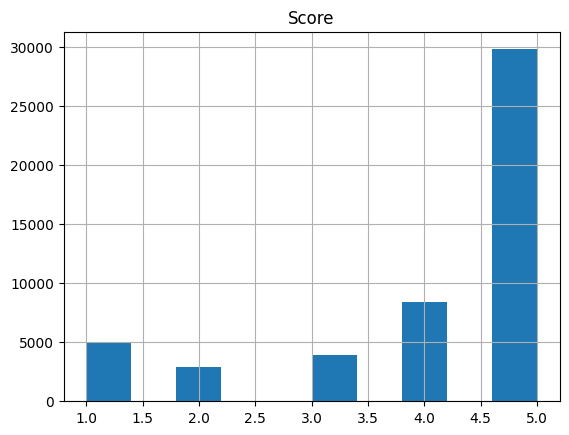

In [6]:
amazon_data.hist('Score')

In [7]:
summaries = amazon_data['Text']
summaries.head(10)

0    The description and photo on this product need...
1    This was a great book!!!! It is well thought t...
2    I am a first year teacher, teaching 5th grade....
3    I got the book at my bookfair at school lookin...
4    Hi! I'm Martine Redman and I created this puzz...
5    My eight year old loves this game, whenever he...
6    The real joy of this movie doesn't lie in its ...
7    Okay, Tim Burton is genuine. He haunts you wit...
8    Boundaries, along with counseling, has given m...
9    120 colors? I say 120 sticks of fun! And a fre...
Name: Text, dtype: object

In [8]:
summaries_list = summaries.to_numpy()
summaries_list

array(['The description and photo on this product needs to be changed to indicate this product is the BuffalOs version of this beef jerky.',
       'This was a great book!!!! It is well thought through, and you can easily imagine the events happening. The Westing Game itself is a great way to tie two things together. The events are well sequenced and exciting. Ellen Raskin wrote a wonderful book',
       "I am a first year teacher, teaching 5th grade. I have a special reading class with high comprehension levels. Reading this book to them was one of the best things I taught them this year. It expanded their minds by allowing them to put themselves in the characters place and was easy for the students to make mind movies. We even used up a whole reading class time in order to finish the book. The students couldn't wait to hear the end. An excellent book that I will be reading every year to my students.",
       ...,
       'This works great, but needs a better way to attach. We made our

In [9]:
max_len = 0
processed_data = []
for summary in summaries_list:
    processed_data.append(pre_model_processing(summary))

for summary in processed_data:
    if len(summary) > max_len:
        max_len = len(summary)


processed_data = pad_sequences(processed_data, maxlen=max_len, padding='post')

processed_data

array([[ 8596,  1097,  6083, ...,     0,     0,     0],
       [18839, 15731,  8571, ...,     0,     0,     0],
       [10848, 14539,  8571, ...,     0,     0,     0],
       ...,
       [18839, 14093,  1852, ...,     0,     0,     0],
       [ 5773, 13309, 14406, ...,     0,     0,     0],
       [10848,  1469,  6320, ...,     0,     0,     0]])

In [10]:
processed_data = np.array(processed_data)
processed_data

scaled_data = StandardScaler().fit_transform(processed_data)
scaled_data

array([[-0.46485507, -1.70129937, -0.88188111, ..., -0.00447218,
        -0.00447218, -0.00447218],
       [ 1.5296819 ,  1.01727532, -0.44469711, ..., -0.00447218,
        -0.00447218, -0.00447218],
       [-0.02634123,  0.79583613, -0.44469711, ..., -0.00447218,
        -0.00447218, -0.00447218],
       ...,
       [ 1.5296819 ,  0.71298221, -1.62533992, ..., -0.00447218,
        -0.00447218, -0.00447218],
       [-1.01455514,  0.56733764,  0.58061184, ..., -0.00447218,
        -0.00447218, -0.00447218],
       [-0.02634123, -1.63219251, -0.84023617, ..., -0.00447218,
        -0.00447218, -0.00447218]])

In [11]:
train_X = processed_data[:int(len(processed_data) * 0.8)]
validation_X = processed_data[int(len(processed_data) * 0.8):]
train_Y = amazon_data['Score'].to_numpy()[:int(len(amazon_data)*0.8)]
validation_Y = amazon_data['Score'].to_numpy()[int(len(amazon_data)*0.8):]



# train_X , validation_X, train_Y, validation_Y = train_test_split(processed_data,amazon_data['Score'].to_numpy(),test_size=0.2,random_state=1066539)

print('Train_X shape --> {}\tValidation_X shape --> {}'.format(train_X.shape, validation_X.shape))
print('Train_Y shape --> {}\tValidation_Y --> {}'.format(train_Y.shape, validation_Y.shape))


Train_X shape --> (40000, 1524)	Validation_X shape --> (10000, 1524)
Train_Y shape --> (40000,)	Validation_Y --> (10000,)


TRAINING 

In [21]:
random_forest_in_greece = RandomForestClassifier(n_estimators=20, verbose=2, max_features=0.9, n_jobs=4, random_state=1066539)
random_forest_in_greece.fit(train_X, train_Y)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 20building tree 2 of 20
building tree 3 of 20
building tree 4 of 20

building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:   25.7s finished


RandomForestClassifier(max_features=0.9, n_estimators=20, n_jobs=4,
                       random_state=1066539, verbose=2)

TESTING

Validation Set Predictions

Mean Absolute Error (MAE) is calculated by taking the summation of the absolute difference between the actual and calculated values of each observation over the entire array and then dividing the sum obtained by the number of observations in the array.

In [22]:
validation_prediction = random_forest_in_greece.predict(validation_X)
errors = abs(validation_prediction - validation_Y)

print('Mean Absolute errors:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute errors: 0.8 degrees.


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


In [23]:
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / validation_Y))
accuracy = 100 - mape
accuracy

50.894000000000005

Text(0, 0.5, 'Number of Instances')

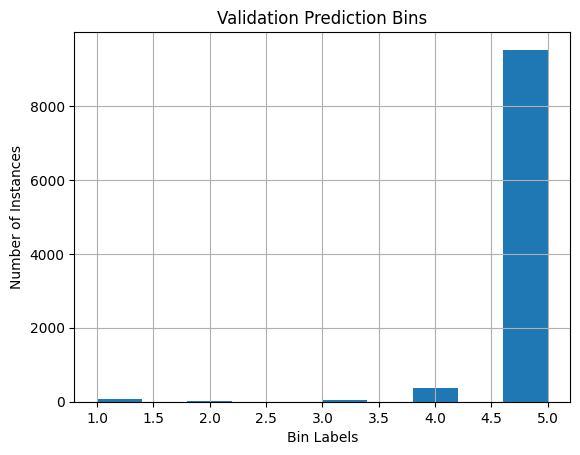

In [24]:
dataframe = pd.DataFrame(validation_prediction)

dataframe.hist()
plt.title('Validation Prediction Bins')
plt.xlabel('Bin Labels')
plt.ylabel('Number of Instances')


In [25]:
report = classification_report(validation_prediction, validation_Y, output_dict=True)
report_dataframe = pd.DataFrame(report).transpose().drop(columns=['support'])
report_dataframe

,precision,recall,f1-score
1,0.009456,0.111111,0.017429
2,0.002128,0.090909,0.004158
3,0.005208,0.105263,0.009926
4,0.037924,0.157895,0.061159
5,0.960705,0.647300,0.773461
accuracy,0.623100,0.623100,0.623100
macro avg,0.203084,0.222496,0.173226
weighted avg,0.915858,0.623100,0.738555


Training set predictions

Mean Absolute Error (MAE) is calculated by taking the summation of the absolute difference between the actual and calculated values of each observation over the entire array and then dividing the sum obtained by the number of observations in the array.

In [26]:
train_prediction = random_forest_in_greece.predict(train_X)
errors = abs(train_prediction - train_Y)

print('Mean Absolute errors:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute errors: 0.01 degrees.


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


In [27]:
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / train_Y))
accuracy = 100 - mape
accuracy

99.67775

Text(0, 0.5, 'Number of Instances')

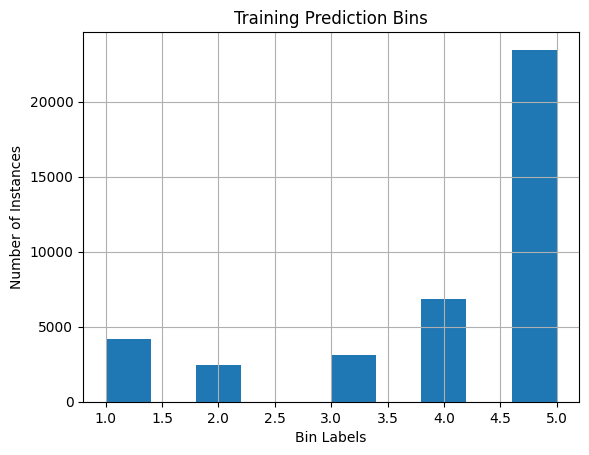

In [28]:
dataframe = pd.DataFrame(train_prediction)
dataframe.hist()
plt.title('Training Prediction Bins')

plt.xlabel('Bin Labels')
plt.ylabel('Number of Instances')

F1 score is a little less intuitive because it combines precision and recall into one metric. If precision and recall are both high, F1 will be high, too.

In [29]:

report = classification_report(train_prediction, train_Y, output_dict=True)
report_dataframe = pd.DataFrame(report).transpose().drop(columns=['support'])
report_dataframe


,precision,recall,f1-score
1,0.995449,0.999279,0.997360
2,0.994281,1.000000,0.997132
3,0.989151,1.000000,0.994546
4,0.993024,0.997810,0.995411
5,0.999829,0.995695,0.997757
accuracy,0.997025,0.997025,0.997025
macro avg,0.994347,0.998557,0.996441
weighted avg,0.997043,0.997025,0.997028
